In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import math
import mtneedlet as mt

/home/idies/miniconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/home/idies/miniconda3/lib/python3.6/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/idies/miniconda3/lib/python3.6/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgco

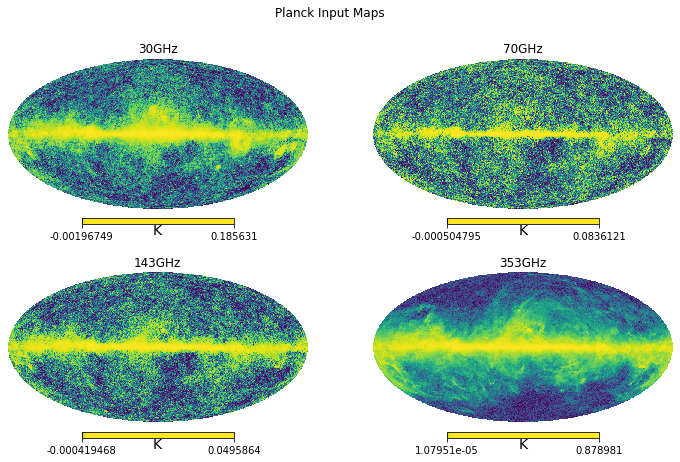

In [2]:
NSIDE = 1024  # LFI are 1024, HFI are 2048, scale all to 1024
LMAX  = 2048  # increase when it definitely works
test_val = 1

CMB_30_p  = hp.read_map("LFI_SkyMap_030-field-IQU_1024_R3.00_full.fits", dtype=None, verbose=False)
CMB_70_p  = hp.read_map("LFI_SkyMap_070-field-IQU_1024_R3.00_full.fits", dtype=None, verbose=False)
CMB_143_p = hp.read_map("HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits", dtype=None, verbose=False)
CMB_353_p = hp.read_map("HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits", dtype=None, verbose=False)

def rescale(map_in, nside):
       
    rescaled = hp.ud_grade(map_in, nside)
    
    return rescaled

CMB_30_p  = rescale(CMB_30_p, NSIDE)
CMB_70_p  = rescale(CMB_70_p, NSIDE)
CMB_143_p = rescale(CMB_143_p, NSIDE)
CMB_353_p = rescale(CMB_353_p, NSIDE)

fig = plt.figure(figsize=(12,7.2))
plt.suptitle('Planck Input Maps')
plt.subplot(2,2,1)
hp.mollview(CMB_30_p, norm='hist', title='30GHz', unit='K', hold=True)
plt.subplot(2,2,2)
hp.mollview(CMB_70_p, norm='hist', title='70GHz', unit='K', hold=True)
plt.subplot(2,2,3)
hp.mollview(CMB_143_p, norm='hist', title='143GHz', unit='K', hold=True)
plt.subplot(2,2,4)
hp.mollview(CMB_353_p, norm='hist', title='353GHz', unit='K', hold=True)

# Needlet ILC method

[source](https://watermark.silverchair.com/mnras0419-1163.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAArUwggKxBgkqhkiG9w0BBwagggKiMIICngIBADCCApcGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMnaaJQghcYyrXRIfYAgEQgIICaMNypPrbdw-md_7KArnlWMT5jexfL49-vyZ4Xd5rJ5hshWl6XIhHUew-Lr244WU5lk0Mgf2Bxfez2bN9USQe7CqOUlMpsC2CthP8rU_lh9mAJJhtHYBXWxGkvBubEtXcQDqnFlA74xTX45Zm-ZCvQ5HyU3wxU9IjnvQ03_kyfnS9eakSB4rSotCmrZ_CbDlK0n56o3Yi1T5pGLxbpE7IvRwbKy6lBik44qbEjZTv1RY6PhpIhuLN7wmHmHNtA6QlioCYWEtfhQxXKxrqSEQE-lK_NzlFZrWcHeP_BKSofC_bbzcKH2XHEs6rSAqhB9fPEkuAnAEBeA2NOCJnCAHkIeBcUxhTmhCGy94Ub6L8zwDYxSjNMZlkqpkxQajM1f2aZldOLRZc62O2U-Ub9UokParNmFKN5pRehCI6hDQz8OxWezukBa4XHCJ01lWJP9LAmVQJftr6lkmBmXWc0MROGLKuw9BBghiWpjrHwG1lftWnFmk5Edr5JNMa6kmHxEo5K5N9Y03YYnhY94jOrcyrnX9R0_NRDQ1bqivKgmIycy8i0rMx58TOQIRaGNFOto9OAxNCPE0U34l3WM4Ep4FiblLyjO7XtA46hMh1uQyTiPnnQuono_NUG0_ZLIm8KC4GAVY59ivjZOZqae85YLi15qV6dJN6xH0U6XmjliN2swGHxtBj_-ee6C70yXUE7IvbnAPuPXlKMP_2ouzEeDd_taNra5a3cz4qSRSLO1c1_Wn5bYaMV6dhHgXSGwra5ZYpT2Tfj2jT_hXKKL6shLRtuPE4FettK_ODBjlctFsdTqCDMvSzUKeUwBE)

## 1 - Convolve maps to the same resolution

### $ a_{lm}^c = \frac{B_l}{B_{l}^c} a_{lm}^{OBS,c}   $ 

where $c$ is the current channel, and $B_l$ is from the largest FWHM channel?

In [3]:
# 1 - convert maps to harmonic space

def harmonic(pmap):
    
    """Just succinctly gives the alm, as LMAX is uniform"""
    
    hmap = hp.map2alm(pmap, lmax=LMAX)
    
    return hmap

def filter_alms(alm_in, h):
    """Applies the filter h to the alm"""
    
    filtered_alm = []
    
    for i in range(len(j_arr)):
        alm_filtered = mt.filtermap_fromalm(alm=alm_in,bl=h[i],nside=NSIDE, returnalm=True)
        filtered_alm.append(alm_filtered[1])
    
    return filtered_alm

def regen_filt_alm2map(alm_in):
    """Give the initial input map from the filtered alm given"""
    
    recovered_alm = []
    
    for j in j_arr: 
        # applies the reverse filter to the filtered maps
        alm_recovered = hp.almxfl(alm_in[j], h[j])   
        recovered_alm.append(alm_recovered)
    
    regen_alm = np.sum(recovered_alm, axis=0)   # combines the series of unfiltered maps
    regen_map = hp.alm2map(regen_alm, nside=NSIDE, lmax=LMAX, verbose=False)
    
    return regen_map

def normaliser(map_in, map_norm_to):
    """For normalising the recovered filtered maps against a known map"""
    # requires some sort of normalisation with regards to the maps:
    norm = np.ptp(map_norm_to) / np.ptp(map_in)
    print(norm)
    normalised_map = map_in * norm

    return normalised_map

In [4]:
CMB_30_h  = harmonic(CMB_30_p)
CMB_70_h  = harmonic(CMB_70_p)
CMB_143_h = harmonic(CMB_143_p)
CMB_353_h = harmonic(CMB_353_p)

alm_set = [CMB_30_h, CMB_70_h, CMB_143_h, CMB_353_h]

FWHM_name_set = ["30GHz","70GHz","143GHz","353GHz"]
FWHM_arc = (32.239, 13.252, 7.248, 4.818)                # arcmin
FWHM_set = [i * (np.pi / (60*180)) for i in FWHM_arc]    # radians
names = ["j=0","j=1","j=2","j=3","j=4","j=5","j=6","j=7","j=8","j=9","j=10","j=11","j=12"]

In [5]:
# 2 - generate Beam functions for each alm
if 0==1:
    beam_set  = []
    for i in range(len(FWHM_set)):
        beam = hp.gauss_beam(fwhm=FWHM_set[i], lmax=LMAX, pol=False)
        beam_set.append(beam)

    # 3 - convolve each map with the base B_l
    beam_mods = []
    for i in range(len(FWHM_set)):
        beam_mod = beam_set[-1]/beam_set[i]
        #beam_mod = beam_set[i]/beam_set[i]
        beam_mods.append(beam_mod)

    alm_modified_set = np.zeros(np.shape(alm_set), dtype=complex)

    for i in range(len(FWHM_set)):
        alm_modified_set[i] = hp.almxfl(alm_set[i], beam_mods[i])

    # viewing the effect of convolving each map:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,2.8))
    plt.suptitle("Input maps")
    plt.axes(ax1)
    hp.mollview(CMB_30_p, norm='hist', title='30GHz', hold=True)
    plt.axes(ax2)
    hp.mollview(CMB_70_p, norm='hist', title='70GHz', hold=True)
    plt.axes(ax3)
    hp.mollview(CMB_143_p, norm='hist', title='143GHz', hold=True)
    plt.axes(ax4)
    hp.mollview(CMB_353_p, norm='hist', title='353GHz', hold=True)


    convolved_maps = []
    for i in range(len(FWHM_set)):
    # convolved maps
        b = hp.alm2map(alm_modified_set[i], nside=NSIDE, lmax=LMAX, verbose=False)
        convolved_maps.append(b)


    fig = plt.figure(figsize=(16,2.8))
    plt.suptitle("Convolved maps")
    for i in range(len(FWHM_set)):
        plt.subplot(1,4,i+1)
        hp.mollview(convolved_maps[i],  norm='hist', title=FWHM_name_set[i], hold=True)
        
else:
    alm_modified_set = alm_set
    convolved_maps = []
    for i in range(len(FWHM_set)):
    # convolved maps
        b = hp.alm2map(alm_set[i], nside=NSIDE, lmax=LMAX, verbose=False)
        convolved_maps.append(b)

## 2 - Decompose each map into a set of filtered maps, represented by the spherical harmonic coefficients

### $ a_{lm}^{c,j} = h_l^{j} a_{lm}^c   $

where the filters, h, are chosen so their squares sum to 1 for each j

In [6]:
# 1 - generate the filters

width = 2.0

log_val = math.log(LMAX,width)

j_arr = np.arange(log_val+1) # always scales j to fit LMAX given a new width B
j_arr = j_arr.astype(int)
#print(j_arr)

h = mt.standardneedlet(B=width, j=j_arr, lmax=LMAX)

# h are chosen so that ∑<j> (h)^2 = 1
# checking:

#for j in j_arr:
#    print(f'for j = {j}, ℓ_peak = {width**j}')

In [7]:
# 2 - decompose each map into filtered maps

filtered_alm_30  = filter_alms(alm_modified_set[0], h)
filtered_alm_70  = filter_alms(alm_modified_set[1], h)
filtered_alm_143 = filter_alms(alm_modified_set[2], h)
filtered_alm_353 = filter_alms(alm_modified_set[3], h)

filtered_alm_set = [filtered_alm_30, filtered_alm_70, filtered_alm_143, filtered_alm_353]

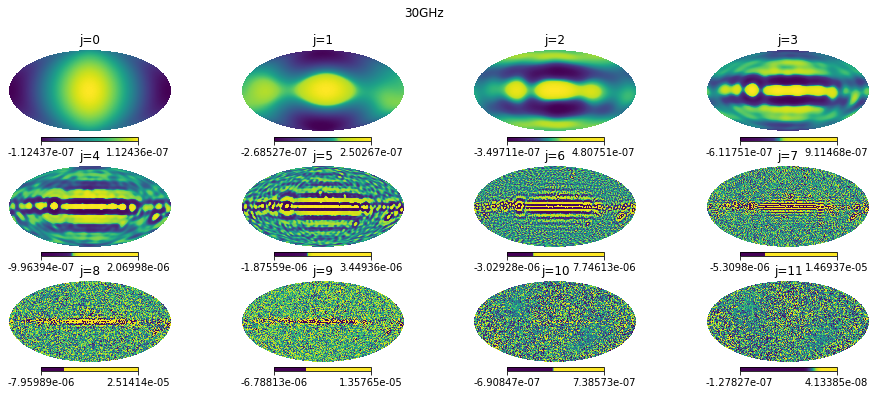

In [8]:
if test_val==1:
    # views all the filtered maps for the 30GHz input map
    fig = plt.figure(figsize=(16,6))
    plt.suptitle(FWHM_name_set[0])
        
    for j in j_arr:
        plt.subplot(3,4,j+1)
        x = hp.alm2map(filtered_alm_set[0][j], nside=NSIDE, lmax=LMAX, verbose=False)
        hp.mollview(x, norm='hist', title=names[j], hold=True)

3547.240053901058
3547.24005390106
3547.240053901058
3547.240053901059


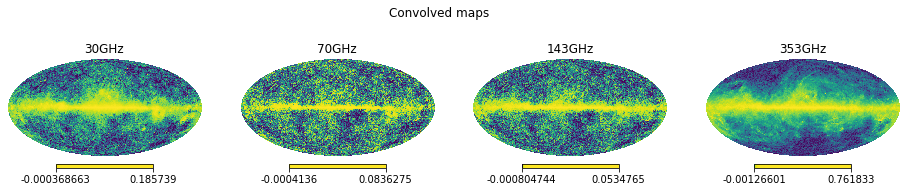

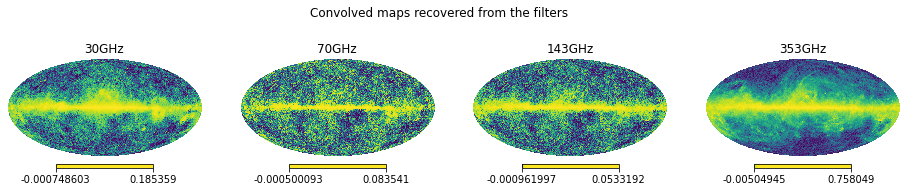

In [9]:
# reversing the filters
regen_map_30  = regen_filt_alm2map(filtered_alm_set[0])
regen_map_70  = regen_filt_alm2map(filtered_alm_set[1])
regen_map_143 = regen_filt_alm2map(filtered_alm_set[2])
regen_map_353 = regen_filt_alm2map(filtered_alm_set[3])

regen_map_30  = normaliser(regen_map_30,  convolved_maps[0])
regen_map_70  = normaliser(regen_map_70,  convolved_maps[1])
regen_map_143 = normaliser(regen_map_143, convolved_maps[2])
regen_map_353 = normaliser(regen_map_353, convolved_maps[3])

regen_set = [regen_map_30,regen_map_70,regen_map_143,regen_map_353]

fig = plt.figure(figsize=(16,2.8))
plt.suptitle("Convolved maps")
for i in range(len(FWHM_set)):
    plt.subplot(1,4,i+1)
    hp.mollview(convolved_maps[i],  norm='hist', title=FWHM_name_set[i], hold=True)
    
fig = plt.figure(figsize=(16,2.8))
plt.suptitle("Convolved maps recovered from the filters")
for i in range(len(FWHM_set)):
    plt.subplot(1,4,i+1)
    hp.mollview(regen_set[i],  norm='hist', title=FWHM_name_set[i], hold=True)

## Generate the needlet coefficients $\beta_{jk}$

## $ \beta_{jk} = \sqrt{\lambda_{jk}} \; \sum^{\ell_{max}}_{\ell=0} \sum^{\ell}_{m=-\ell} h_\ell^j \; a_{\ell m} \; Y_{\ell m}(\xi_{jk})     $ 

Where $\{\xi_{jk}\}$ denotes a set of cubature points on the sphere for scale j.

"In practice we identify these points with the pixel centres in the Healpix pixelisation scheme. Each index k corresponds to a particular pixel, at resolution parameter **nside(j)** particular to that scale, j."

In [10]:
j_nside_arr = np.zeros(len(j_arr), dtype = int)
j_npix_arr  = np.zeros(len(j_arr), dtype = int)

for j in j_arr:
    
    j_nside_arr[j] = hp.order2nside(j)             # resolution parameter j
    j_npix_arr[j]  = hp.nside2npix(j_nside_arr[j]) # pixels for that resolution
    
    print(f'for j = {j}, nside = {j_nside_arr[j]}, npix = {j_npix_arr[j]}')

for j = 0, nside = 1, npix = 12
for j = 1, nside = 2, npix = 48
for j = 2, nside = 4, npix = 192
for j = 3, nside = 8, npix = 768
for j = 4, nside = 16, npix = 3072
for j = 5, nside = 32, npix = 12288
for j = 6, nside = 64, npix = 49152
for j = 7, nside = 128, npix = 196608
for j = 8, nside = 256, npix = 786432
for j = 9, nside = 512, npix = 3145728
for j = 10, nside = 1024, npix = 12582912
for j = 11, nside = 2048, npix = 50331648


## $ \beta_{jk} = $ `alm2map (`$h_l^j a_{lm}$, `nside=nside`$_{\xi}$`)`

## $ a^j_{lm} = h_l^j $ `map2alm(`$\beta_{jk} $ `lmax=LMAX)`

In [11]:
# 2 - Formalising into functions

def needlet_coeff(chosen_map_val):
    
    """Takes an input value corresponding to the specific GHz frequency
    being converted into a set of needlet coefficient maps"""
    
    filtered_alm_curr  = filtered_alm_set[chosen_map_val]

    beta_jk_arr = []
    
    for j in j_arr:
        
        alpha = filtered_alm_curr[j]                                          # h already applied to the alms
        alpha_ylm = hp.alm2map(alpha, nside=j_nside_arr[j], verbose=False)

        beta_jk = alpha_ylm
        beta_jk_arr.append(beta_jk) 
    
    return beta_jk_arr

def needlet_recov(beta_jk_in):
    
    """Converts the needlet coefficients back into the alm form. Returns both alm and maps"""

    alm_j = []
    recovered_maps = []

    for j in j_arr:

        beta = beta_jk_in[j]
        beta_ylm = hp.map2alm((beta), lmax=LMAX)
        halm = hp.almxfl(beta_ylm, h[j])    
        #halm = hp.almxfl(halm, h[j])
        #halm = hp.almxfl(halm, h[j])
        #halm = beta_ylm
        alm_j.append(halm)

        recovered_maps.append(-1*hp.alm2map(halm, lmax=LMAX, nside=NSIDE, verbose=False))
    
    return recovered_maps

## ILC process:

- The ILC estimate of the needlet coefficients of the cleaned map is obtained as a linearly weighted sum of the needlet coefficients $\beta^c_{jk}$

$ \beta^{NILC}_{jk} = \sum^{n_c}_{c=1} \: w^c_{jk} \beta^c_{jk} $

In [12]:
# Generating all the needed needlet maps

needlet_maps_set = []

for i in range(len(FWHM_set)):
    x = needlet_coeff(i)
    needlet_maps_set.append(x)

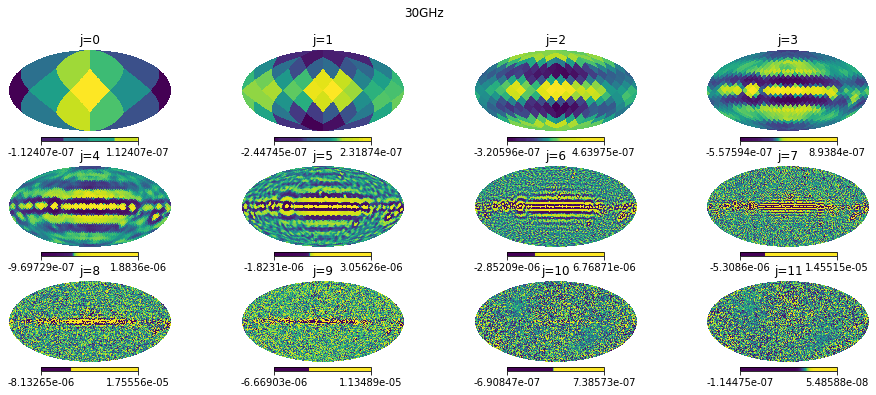

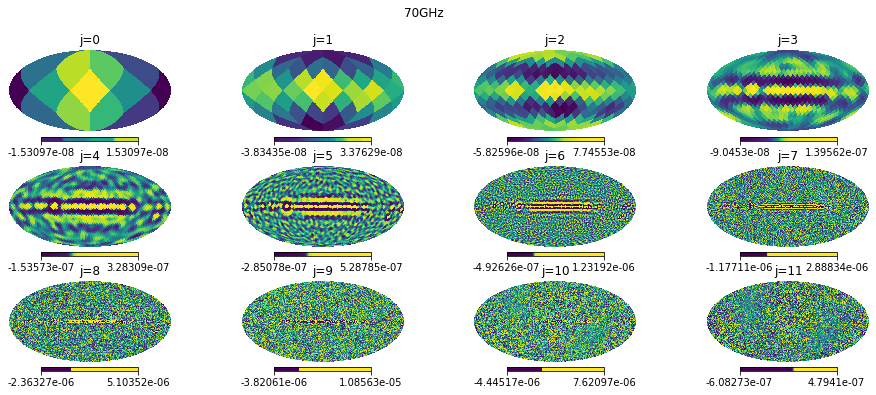

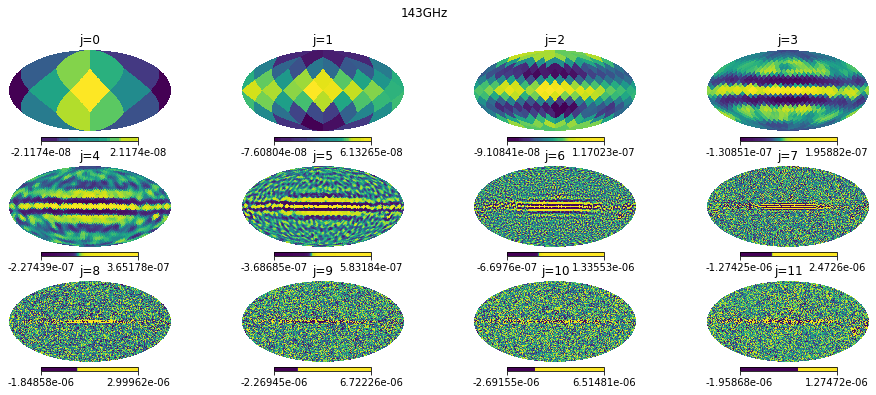

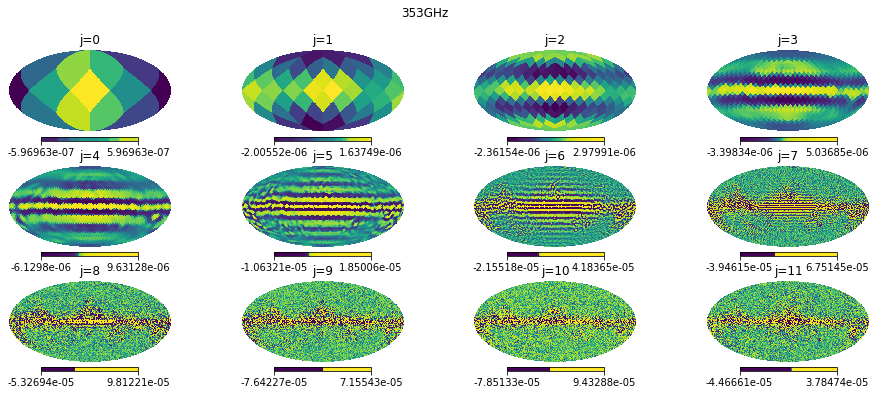

In [13]:
if test_val==1:
    # viewing the β maps for each of the 4 input maps (in ascending order of frequency)

    for i in range(len(FWHM_set)):
        fig = plt.figure(figsize=(16,6))
        plt.suptitle(FWHM_name_set[i])
        
        for j in j_arr:
            plt.subplot(3,4,j+1)
            hp.mollview(needlet_maps_set[i][j], norm='hist', title=names[j], hold=True)

In [14]:
# slightly modified and condensed basic ILC functions

def output_map(hmaps):

    """Goes from start to finish of the alms to a completed 
    singular ILC map, does not need weight_from_alms done first, but
    does not give the individual weights openly"""

    # calculate the C and C inverse matrix
    maps_stack = np.stack(hmaps)

    stack_cut = np.delete(maps_stack, obj=0, axis=1)

    C_lm = np.cov(stack_cut)
    C_inv = np.linalg.inv(C_lm)

    numerator = np.sum(C_inv, axis=0)
    denominator = np.sum(numerator) 
    w = numerator / denominator

    #check the weight requirement:
    w_tot = np.sum(w)
    #print("The total weight is:",w_tot)


    # apply the weights to the component alms
    weighted_maps = np.empty(shape=np.shape(hmaps), dtype=np.complex_)

    for i in range(len(w)):
        row_slice = hmaps[i]        
        weighted_maps[i] = row_slice * w[i]

    hmap = np.sum(weighted_maps, axis = 0)

    fin_map = hp.alm2map(hmap, lmax=LMAX, nside=NSIDE, verbose=False)

    return fin_map

In [15]:
# need to convert the maps of needlet coefficients into alms?
# array sorted by the filter frequencies, each with
# len(FWHM_set) sets of alms within

needlet_hmaps_set = np.zeros((len(j_arr),len(FWHM_set),len(alm_modified_set[0])),dtype='complex')    
    
for j in j_arr:
    for i in range(len(FWHM_set)):
        #needlet_hmaps_set[j,i] = harmonic(needlet_maps_set[i][j])
        needlet_hmaps_set[j][i] = hp.map2alm(needlet_maps_set[i][j], lmax=LMAX)

In [16]:
ILC_maps = []

for j in j_arr:
    j_ILC = output_map(needlet_hmaps_set[j])
    ILC_maps.append(j_ILC)

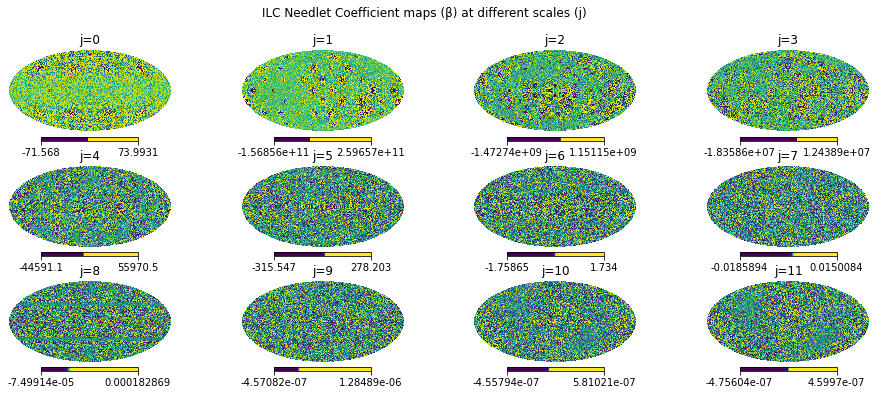

In [17]:
if test_val==1:
    
    fig = plt.figure(figsize=(16,6))
    plt.suptitle("ILC Needlet Coefficient maps (β) at different scales (j)")
    for j in j_arr:
        plt.subplot(3,4,j+1)
        hp.mollview(ILC_maps[j], norm='hist', title=names[j], hold=True)

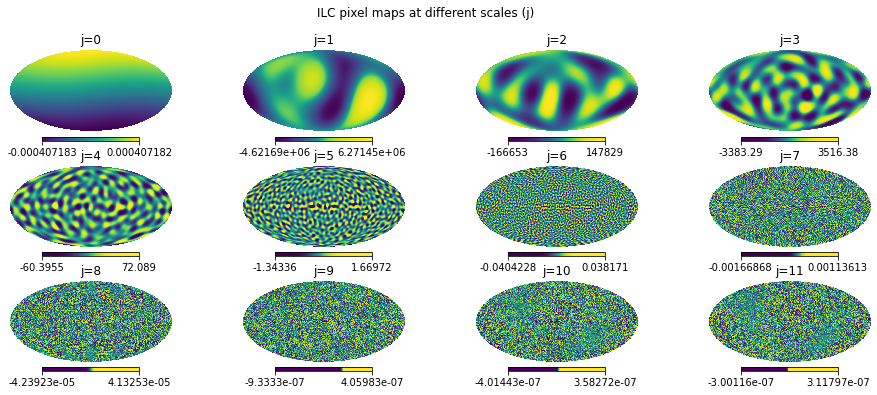

In [18]:
# looks like an unfiltered set of maps, run it through the filter:

ILC_recov = needlet_recov(ILC_maps)

if test_val==1:
    
    fig = plt.figure(figsize=(16,6))
    plt.suptitle("ILC pixel maps at different scales (j)")
    for j in j_arr:
        plt.subplot(3,4,j+1)
        hp.mollview(ILC_recov[j], norm='hist', title=names[j], hold=True)

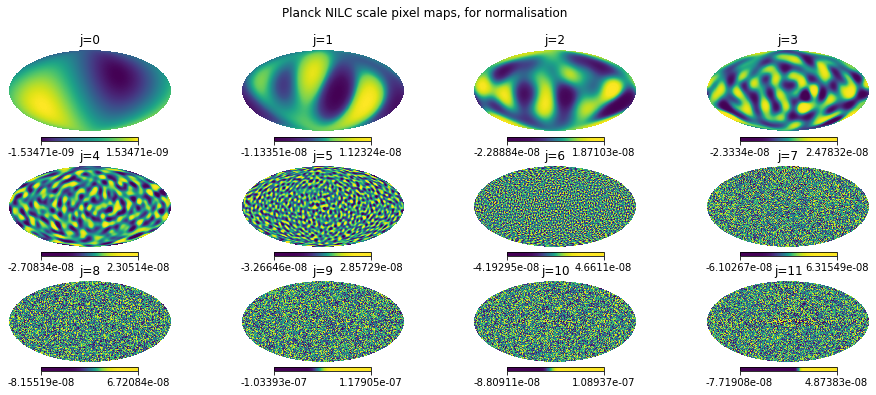

In [35]:
# trying to normalise against the Planck NILC filtered maps

NILC_planck = hp.read_map("COM_CMB_IQU-nilc_2048_R3.00_full.fits", dtype=None, field=0, verbose=False)
NILC_planck = rescale(NILC_planck, NSIDE)

NILC_filtered_hmaps = filter_alms(harmonic(NILC_planck), h)
NILC_filtered_pmaps = []

fig = plt.figure(figsize=(16,6))
plt.suptitle("Planck NILC scale pixel maps, for normalisation")
for j in j_arr:
    plt.subplot(3,4,j+1)
    x = hp.alm2map(NILC_filtered_hmaps[j], nside=NSIDE, lmax=LMAX, verbose=False)
    NILC_filtered_pmaps.append(x)
    hp.mollview(x, norm='hist', title=names[j], hold=True)

(0.0034122294131756913+0.0006928079195068595j)
(0.0061170124383965385+0.00016805960207436082j)
(0.009900112165281312+0j)
(0.012534326212511064+0j)
(0.01641851817619074+0j)
(0.030256830366679723+0j)
(0.07901463720497526+0j)
(0.2394408608886162+0j)
(0.9051144665868573+0j)
(4.2215828117302925-1.0891919056983999j)
(11.217563256039158+4.59447466178247j)
(17.18492134196641+4.316814838036504j)


/home/idies/miniconda3/lib/python3.6/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


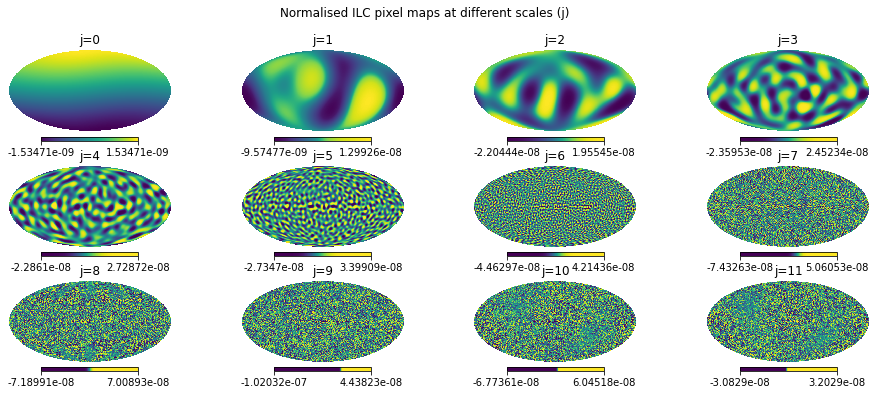

In [37]:
# must then normalise these maps before summing them
# trying to normalise against the Planck NILC filtered maps

ILC_recov_norm = ILC_recov

for j in j_arr:
    ILC_recov_norm[j] = normaliser(ILC_recov_norm[j], NILC_filtered_pmaps[j])
    
if test_val==1:
    
    fig = plt.figure(figsize=(16,6))
    plt.suptitle("Normalised ILC pixel maps at different scales (j)")
    for j in j_arr:
        plt.subplot(3,4,j+1)
        hp.mollview(ILC_recov_norm[j], norm='hist', title=names[j], hold=True)

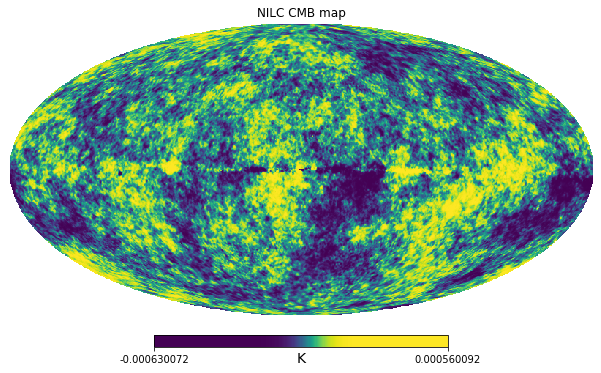

In [38]:
# final recovered map:

NILC_map = np.sum(ILC_recov_norm, axis=0) * 3547.24005390106

hp.mollview(NILC_map, norm='hist', title='NILC CMB map',unit='K')

In [39]:
#'' Read in theoretical power spectrum from CAMB and renormalise '''
theorycls = [0.0]
theorycls.append(0.0)  
clsfile = open("CAMB_theory_cls.dat",'r')
data = clsfile.readlines()
for line in data :
    words = line.split()
    theorycls.append(float(words[1]) * 10**-12)
clsfile.close()
theorycls = theorycls[0:LMAX+1]

for l in range(1, LMAX+1):
    theorycls[l] = theorycls[l]/float(l*(l+1))*2.*np.pi
    
ILC_map = hp.synfast(theorycls, nside=NSIDE, lmax=LMAX)
ILC_alm = hp.map2alm(ILC_map, lmax=LMAX)
#hp.mollview(ILC_map, norm='hist', title='Theoretical CMB map',unit='K')

/home/idies/miniconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(0.8372376967572187-1.9122734298247874e-17j)


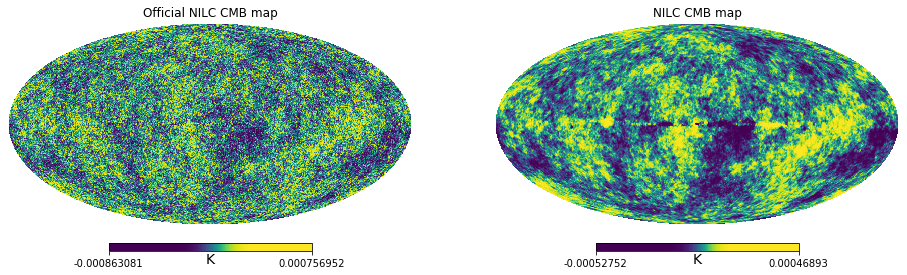

In [40]:
NILC_official = NILC_planck # changed code, should refacotr, but can't be bothered

NILC_map_norm = normaliser(NILC_map, NILC_official)

fig = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
hp.mollview(NILC_official, norm='hist', title='Official NILC CMB map',unit='K', hold=True)
plt.subplot(1,2,2)
hp.mollview(NILC_map_norm, norm='hist', title='NILC CMB map',unit='K', hold=True)

/home/idies/miniconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:230: ComplexWarning: Casting complex values to real discards the imaginary part
  pixel_weights_filename=pixel_weights_filename,


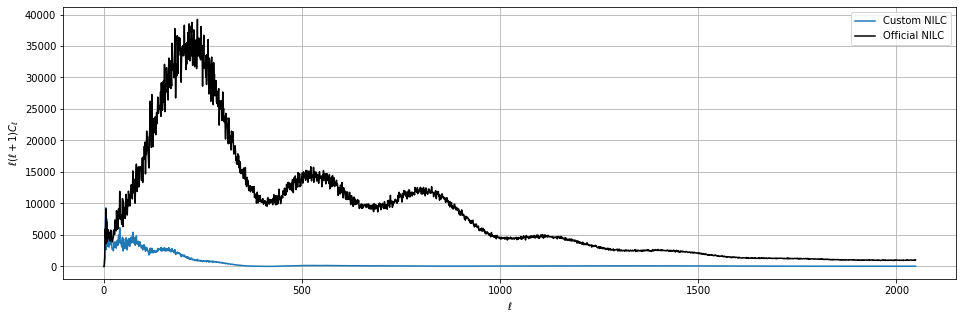

In [46]:
cl = hp.anafast(NILC_map_norm, lmax=LMAX) * 10**12
cl_official = hp.anafast(NILC_official, lmax=LMAX) * 10**12
ell = np.arange(LMAX+1)

plt.figure(figsize=(16, 5))
#for j in j_arr:
#    plt.axvline(2**j,c='black')
#plt.plot(ell, ell * (ell + 1) * theorycls * 10**7, label="Theoretical")
plt.plot(ell, ell * (ell + 1) * cl, label="Custom NILC")
plt.plot(ell, ell * (ell + 1) * cl_official, label="Official NILC", c='black')
plt.xlabel("$\ell$")
#plt.ylim(0,45000)
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.legend()
plt.title('Output NILC in Comparison to Planck NILC')
plt.grid()
#plt.xlim(0,128)

/home/idies/miniconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:230: ComplexWarning: Casting complex values to real discards the imaginary part
  pixel_weights_filename=pixel_weights_filename,


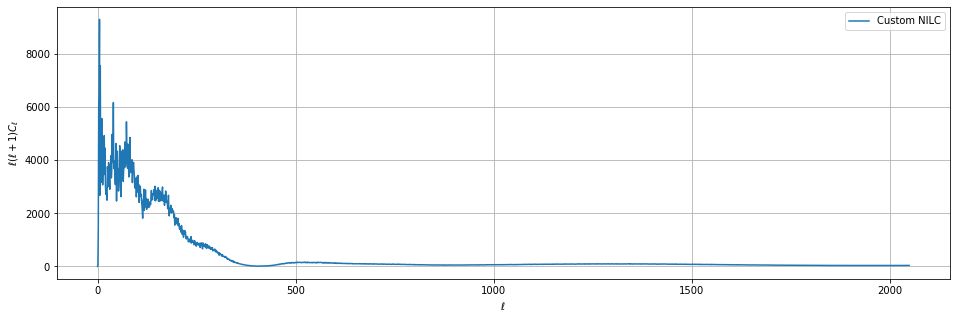

In [47]:
cl = hp.anafast(NILC_map_norm, lmax=LMAX) * 10**12
cl_official = hp.anafast(NILC_official, lmax=LMAX) * 10**12
ell = np.arange(LMAX+1)

plt.figure(figsize=(16, 5))
#for j in j_arr:
#    plt.axvline(2**j,c='black')
#plt.plot(ell, ell * (ell + 1) * theorycls * 10**7, label="Theoretical")
plt.plot(ell, ell * (ell + 1) * cl, label="Custom NILC")
#plt.plot(ell, ell * (ell + 1) * cl_official, label="Official NILC", c='black')
plt.xlabel("$\ell$")
#plt.ylim(0,45000)
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.legend()
plt.grid()
#plt.xlim(0,128)